<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Открываем-файл-с-данными-и-изучаем-общую-информацию." data-toc-modified-id="Открываем-файл-с-данными-и-изучаем-общую-информацию.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Открываем файл с данными и изучаем общую информацию.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Приоритизация-гипотез." data-toc-modified-id="Приоритизация-гипотез.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Приоритизация гипотез.</a></span></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ A/B-теста</a></span></li><li><span><a href="#Проверка-статистической-гипотезы." data-toc-modified-id="Проверка-статистической-гипотезы.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка статистической гипотезы.</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Приоритизация гипотез, анализ A/B-теста

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга я подготовил список гипотез для увеличения выручки.  
Теперь надо приоритизировать продуктовые гипотезы, затем запустить A/B-тест и проанализировать результаты. 

### Открываем файл с данными и изучаем общую информацию.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
hypothes = pd.read_csv('/datasets/hypothesis.csv')
hypothes.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [4]:
hypothes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
hypothes.isna().agg(['sum', 'mean'])

,Hypothesis,Reach,Impact,Confidence,Efforts
sum,0.0,0.0,0.0,0.0,0.0
mean,0.0,0.0,0.0,0.0,0.0


In [6]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
orders.isna().agg(['sum', 'mean'])

,transactionId,visitorId,date,revenue,group
sum,0.0,0.0,0.0,0.0,0.0
mean,0.0,0.0,0.0,0.0,0.0


In [9]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
visitors.isna().agg(['sum', 'mean'])

,date,group,visitors
sum,0.0,0.0,0.0
mean,0.0,0.0,0.0


**Описание данных**  

Таблица `hypothes`  
`Hypothesis` — краткое описание гипотезы;  
`Reach` — охват пользователей по 10-балльной шкале;  
`Impact` — влияние на пользователей по 10-балльной шкале;  
`Confidence` — уверенность в гипотезе по 10-балльной шкале;  
`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  


Таблица `orders`     
`transactionId` — идентификатор заказа;  
`visitorId` — идентификатор пользователя, совершившего заказ;  
`date` — дата, когда был совершён заказ;      
`revenue` — выручка заказа;  
`group `— группа A/B-теста, в которую попал заказ.  


Таблица `visitors`  
`date` — дата;  
`group` — группа A/B-теста;  
`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста  

In [12]:
print(f"В группе А уникальных пользователей: {orders[orders['group'] == 'A']['visitorId'].nunique()}")
print(f"В группе В уникальных пользователей: {orders[orders['group'] == 'B']['visitorId'].nunique()}")

В группе А уникальных пользователей: 503
В группе В уникальных пользователей: 586


In [13]:
print(f"Выручка в группе А : {orders[orders['group'] == 'A']['revenue'].sum()}")
print(f"Выручка в группе В : {orders[orders['group'] == 'B']['revenue'].sum()}")

Выручка в группе А : 4084803
Выручка в группе В : 5907760


In [14]:
print(f"Минимальна дата в таблице orders: {orders['date'].min()} максимальная {orders['date'].max()}")
print(f"Минимальна дата в таблице visitors: {visitors['date'].min()} максимальная {visitors['date'].max()}")

Минимальна дата в таблице orders: 2019-08-01 максимальная 2019-08-31
Минимальна дата в таблице visitors: 2019-08-01 максимальная 2019-08-31


**Вывод:**  
Есть три таблицы `hypothes` надо название колонок привести к нижнем регистру, `orders` и `visitors`  столбец `date` сделать из объекта датой. Данные продаж приведены за месяц, на первый взгляд критический нарушений нет.

### Предобработка данных

In [15]:
hypothes.columns =[h.lower() for h in hypothes.columns]
hypothes.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [16]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

In [17]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [18]:
orders.dtypes

transactionId             int64
visitorId                 int64
date             datetime64[ns]
revenue                   int64
group                    object
dtype: object

In [19]:
visitors.dtypes

date        datetime64[ns]
group               object
visitors             int64
dtype: object

Проверим на наличие дубликатов.

In [20]:
display(orders.duplicated().sum())
visitors.duplicated().sum()

0

0

Явных дубликатов нет.
Отфильтруем по группе и проверим что массивы с ID не пересекаются

In [21]:
t = np.intersect1d(orders.query('group == "B"')['visitorId'], orders.query('group == "A"')['visitorId'])
t

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

In [22]:
orders[orders['visitorId'] == 8300375]

,transactionId,visitorId,date,revenue,group
71,3679129301,8300375,2019-08-01,10510,B
703,4293855558,8300375,2019-08-07,1790,A


Одни и те же пользователи попали в обе группы, посмотрим количество

In [23]:
len(np.intersect1d(orders.query('group == "B"')['visitorId'], orders.query('group == "A"')['visitorId']))

58

In [24]:
len(np.intersect1d(orders.query('group == "B"')['visitorId'], 
                   orders.query('group == "A"')['visitorId'])
   ) / orders['visitorId'].nunique() * 100

5.625606207565471

In [25]:
(orders.query('visitorId in @ t')['revenue'].sum() / orders['revenue'].sum() * 100).round(2)

15.6

В обе группы попало 58 пользователей, они составляют 5,6% от всей массы, на их долю приходится более 15% продаж 

**Вывод:**  
В подготовке эксперимента была допущена ошибка из-за которой одни и те же пользователи попали в обе группы. Эти пользователи занимают весомую долю в продажах. У нас нет возможности удалить их из таблицы `visitors`, нам надо найти причину ошибки и повторить эксперимент. Тк в данный момент такой возможности нет, будем анализировать данные которые есть.

### Приоритизация гипотез.

In [26]:
hypothes.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


У нас есть девять гипотез, придётся выбрать, что будем тестировать, а чему скажем «нет».  
Для удобства пронумеруем их.

In [27]:
hypothes['number'] = np.arange(hypothes.shape[0])

Применим один из самых популярных способов приоритизации задач метод ICE 

In [28]:
hypothes['ice'] = (hypothes['impact'] * hypothes['confidence'] / hypothes['efforts']).round(2)

In [29]:
hypothes[['ice' ,'number', 'hypothesis']].sort_values(by='ice', ascending=False).style.background_gradient(
    cmap='Blues', subset='ice').set_precision(2) 

,ice,number,hypothesis
8,16.20,8,"Запустить акцию, дающую скидку на товар в день рождения"
0,13.33,0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
7,11.20,7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
6,8.00,6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
2,7.00,2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
1,2.00,1,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,1.33,5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
3,1.12,3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
4,1.00,4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


Можем выделить 5 гипотез, под номерами 8, 0, 7, 6, 2  
Для расчета добавим Reach, этот фактор предназначен для оценки, сколько пользователей увидят изменения.

In [30]:
hypothes['rice'] = hypothes['ice'] *  hypothes['reach']

In [31]:
hypothes[['rice' ,'number', 'hypothesis']].sort_values(by='rice', ascending=False).style.background_gradient(
    cmap='Blues', subset='rice').set_precision(2) 

,rice,number,hypothesis
7,112.00,7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
2,56.00,2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
6,40.00,6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
0,39.99,0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
8,16.20,8,"Запустить акцию, дающую скидку на товар в день рождения"
3,8.96,3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
1,4.00,1,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,3.99,5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
4,3.00,4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


ТОП 5 не изменился, но между собой гипотезы поменяли местами, на первое место вышел 7 номер, а 8 занял пятую строчку.  
Посмотрим на оценки параметров, что бы понять причину изменения 

In [32]:
hypothes[hypothes['number'].isin([7, 8])]

,hypothesis,reach,impact,confidence,efforts,number,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,7,11.2,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,8,16.2,16.2


`Запустить акцию, дающую скидку на товар в день рождения` касается только именинников соответственно ей присвоен минимальное значение `reach`..  
А `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок` затронет всех пользователей.  
За счет параметра `reach` у нас произошли изминения в приоритизация гипотез.

**Вывод:**  
Мы приоритизировали гипотезы разными методами, можно сделать вывод, что от метода зависит конечный результат.   
Надо сперва определить метод, а после присупать к приоритизации.

### Анализ A/B-теста

In [33]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [34]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


**Построим график кумулятивной выручки по группам.**  
Чтобы это сделать, нужно собрать кумулятивные данные

In [35]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(
    orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
    {'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), 
                                     axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(
    visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
    {'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [36]:
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [37]:
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [38]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


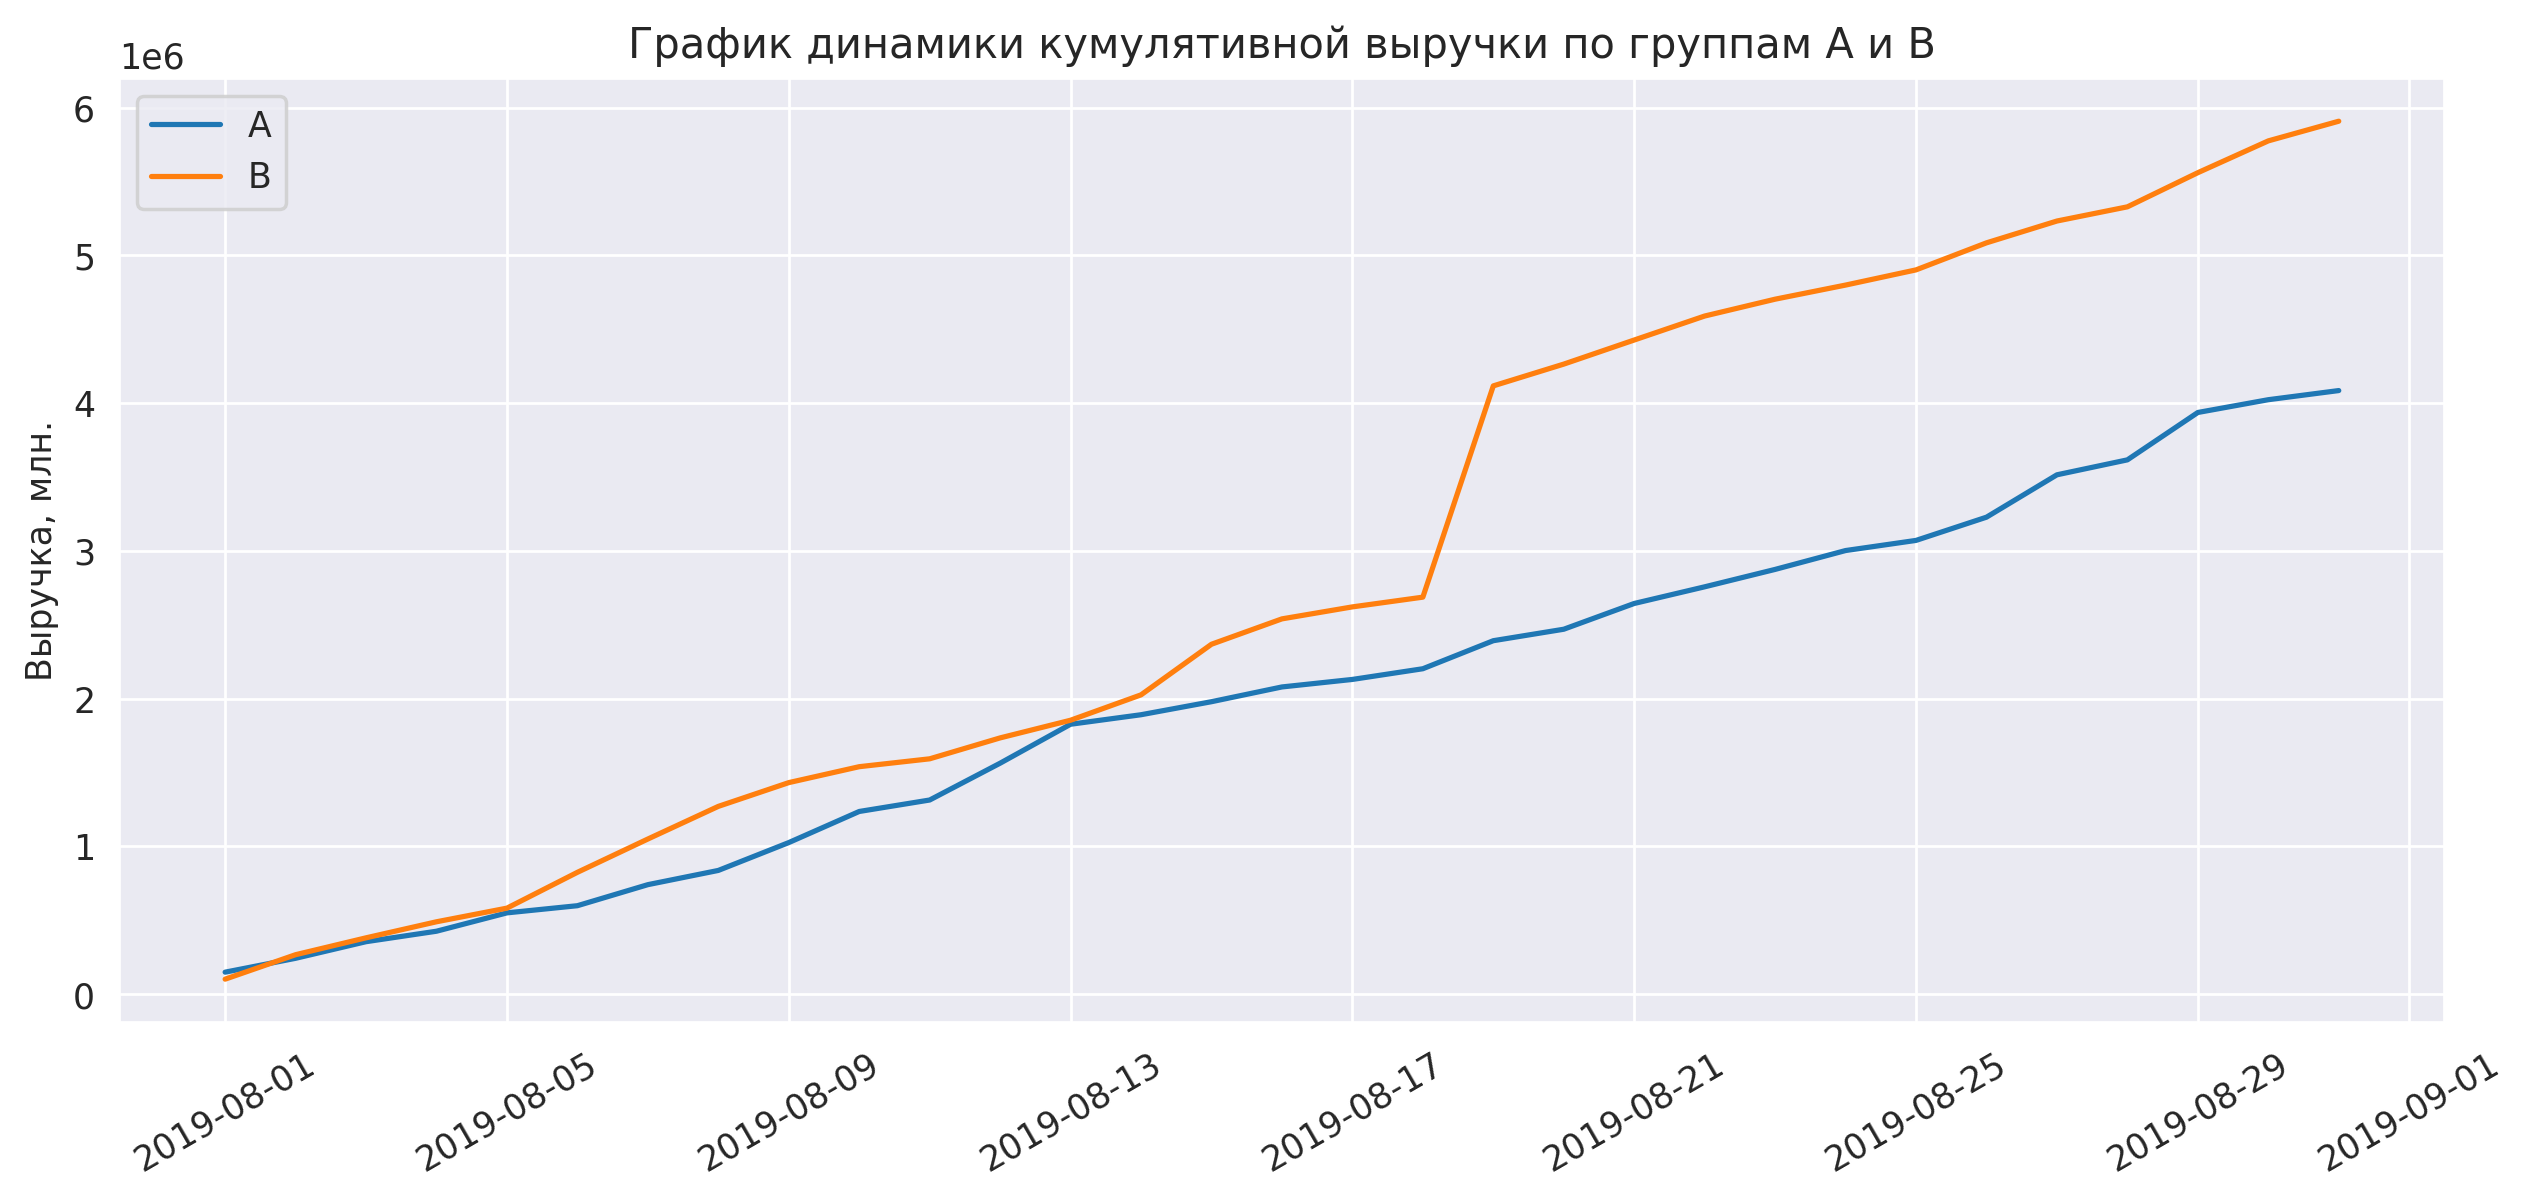

In [39]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А и В
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(12, 5), dpi= 250)

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')


plt.title('График динамики кумулятивной выручки по группам А и В', fontsize=12)
plt.ylabel("Выручка, млн.", fontsize=10)
plt.xticks(rotation=30)
plt.legend()
plt.show()

В группе А выручка почти равномерно увеличивается в течение всего теста,  
В группе В есть резкий скачок, это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Позже проанализируем эти выбросы.  

**Построим графики среднего чека по группам**  — разделим кумулятивную выручку на кумулятивное число заказов

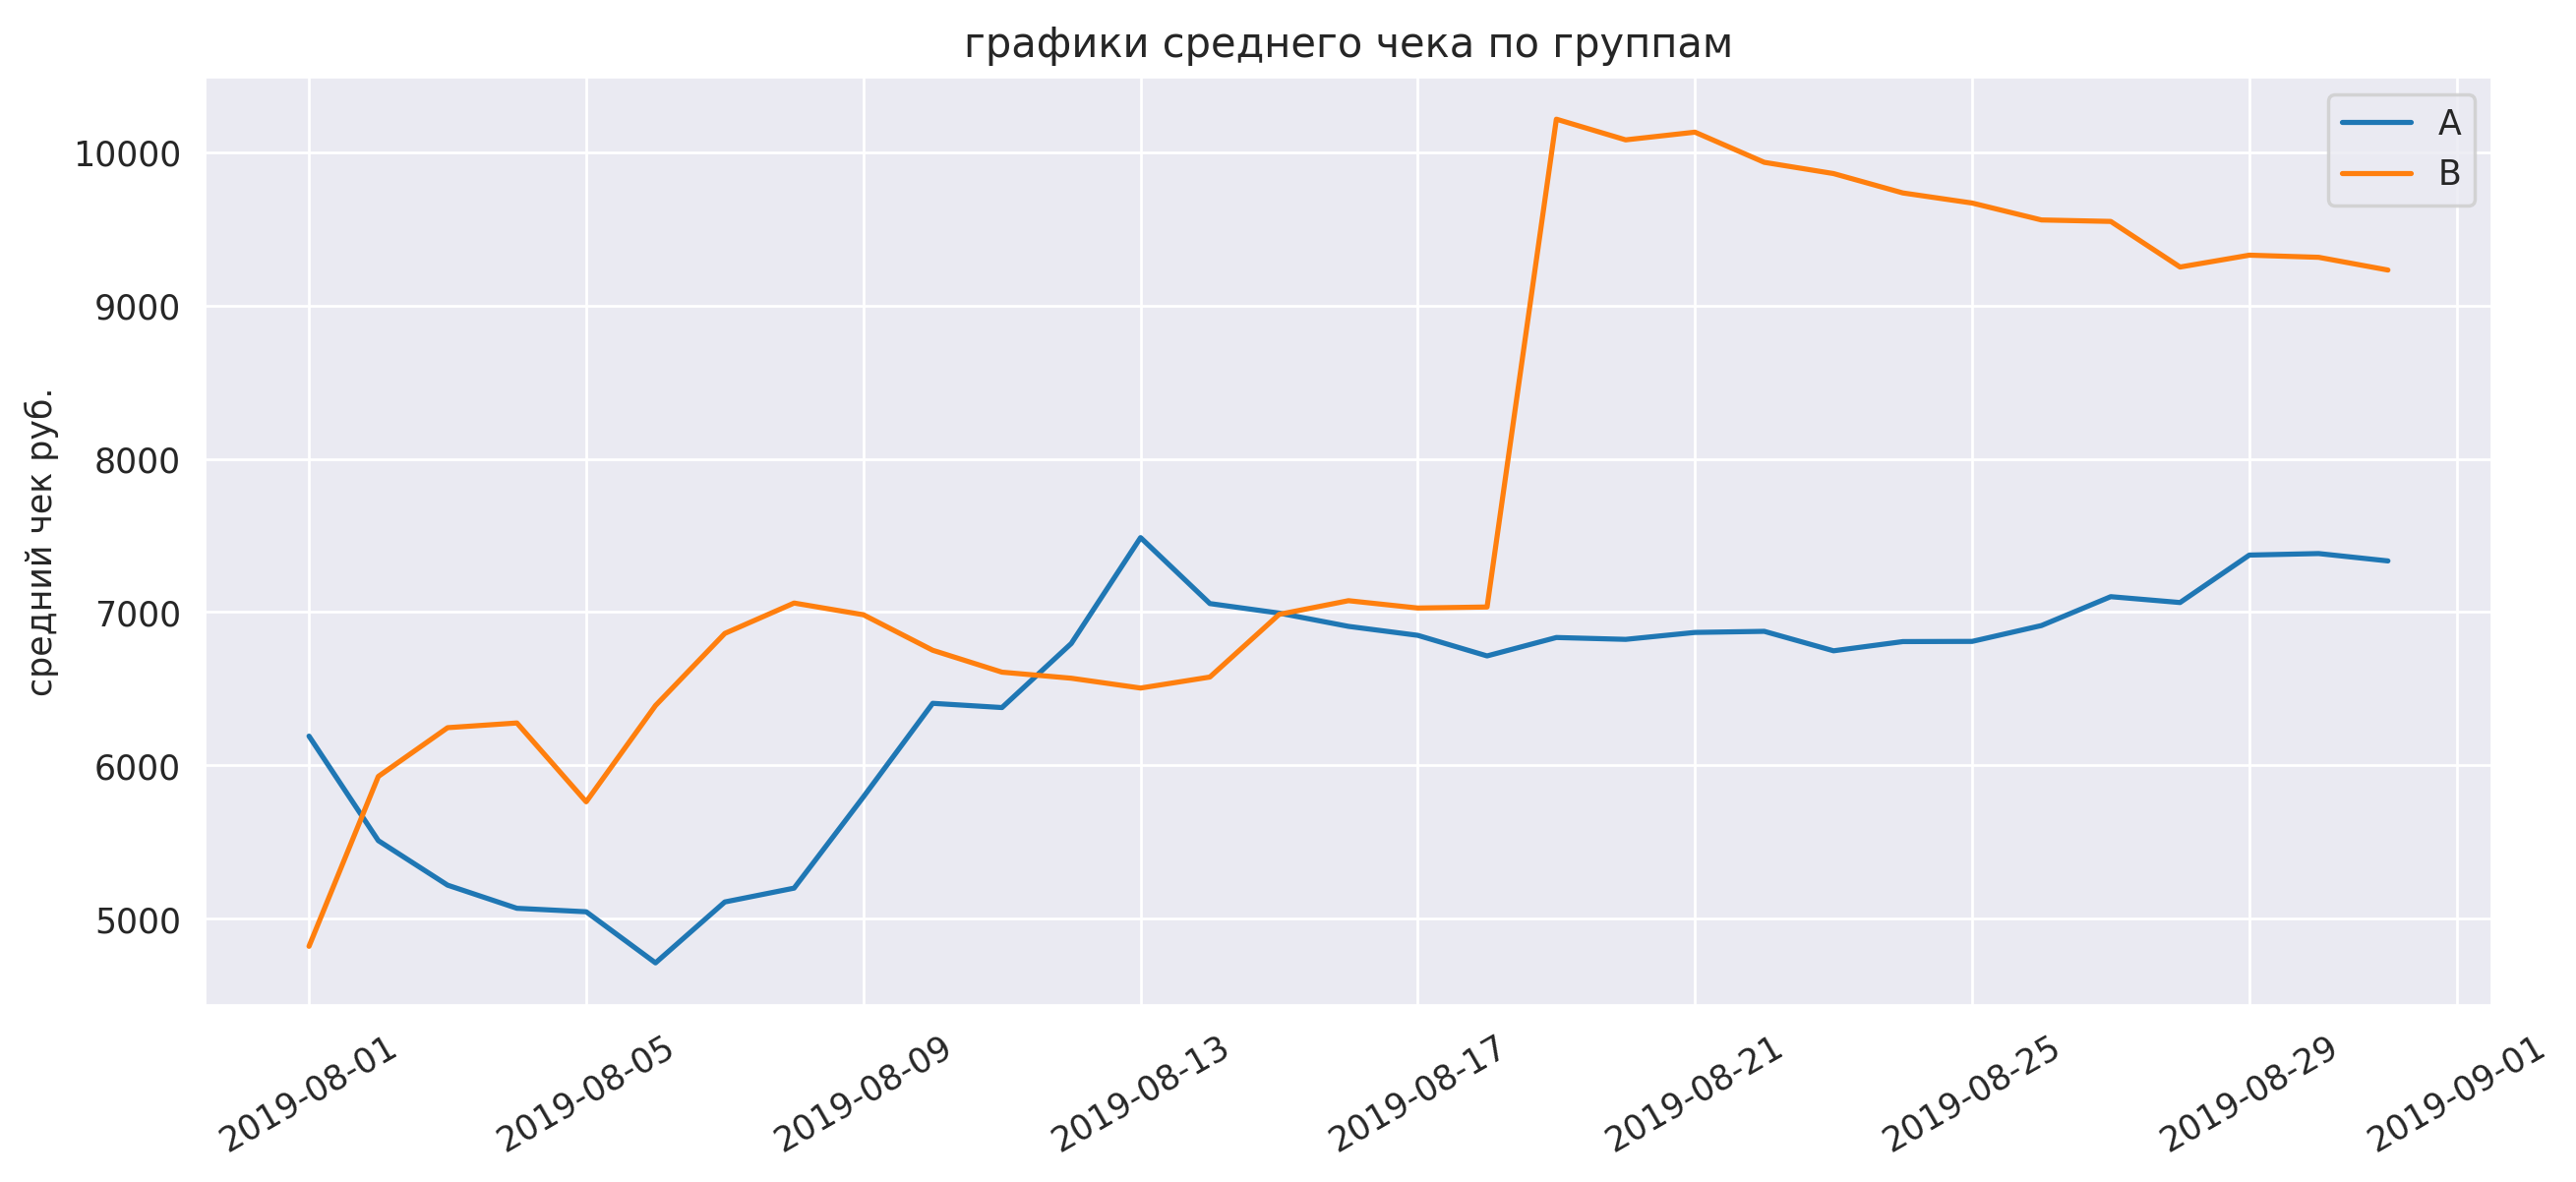

In [40]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(12, 5), dpi= 250)

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('графики среднего чека по группам', fontsize=12)
plt.ylabel("средний чек руб.", fontsize=10)
plt.xticks(rotation=30)
plt.legend()
plt.show()

Ориентировочно в группе А средний чек стабилизовался с 13 августа и находится в диапазоне 6500-7500 руб.  
В группе В был скачок 18/08, чтобы прийти к реальному среднему чеку и установиться на его уровне нам надо больше времени или избавиться от выбросов.  

Построим график относительного различия для среднего чека

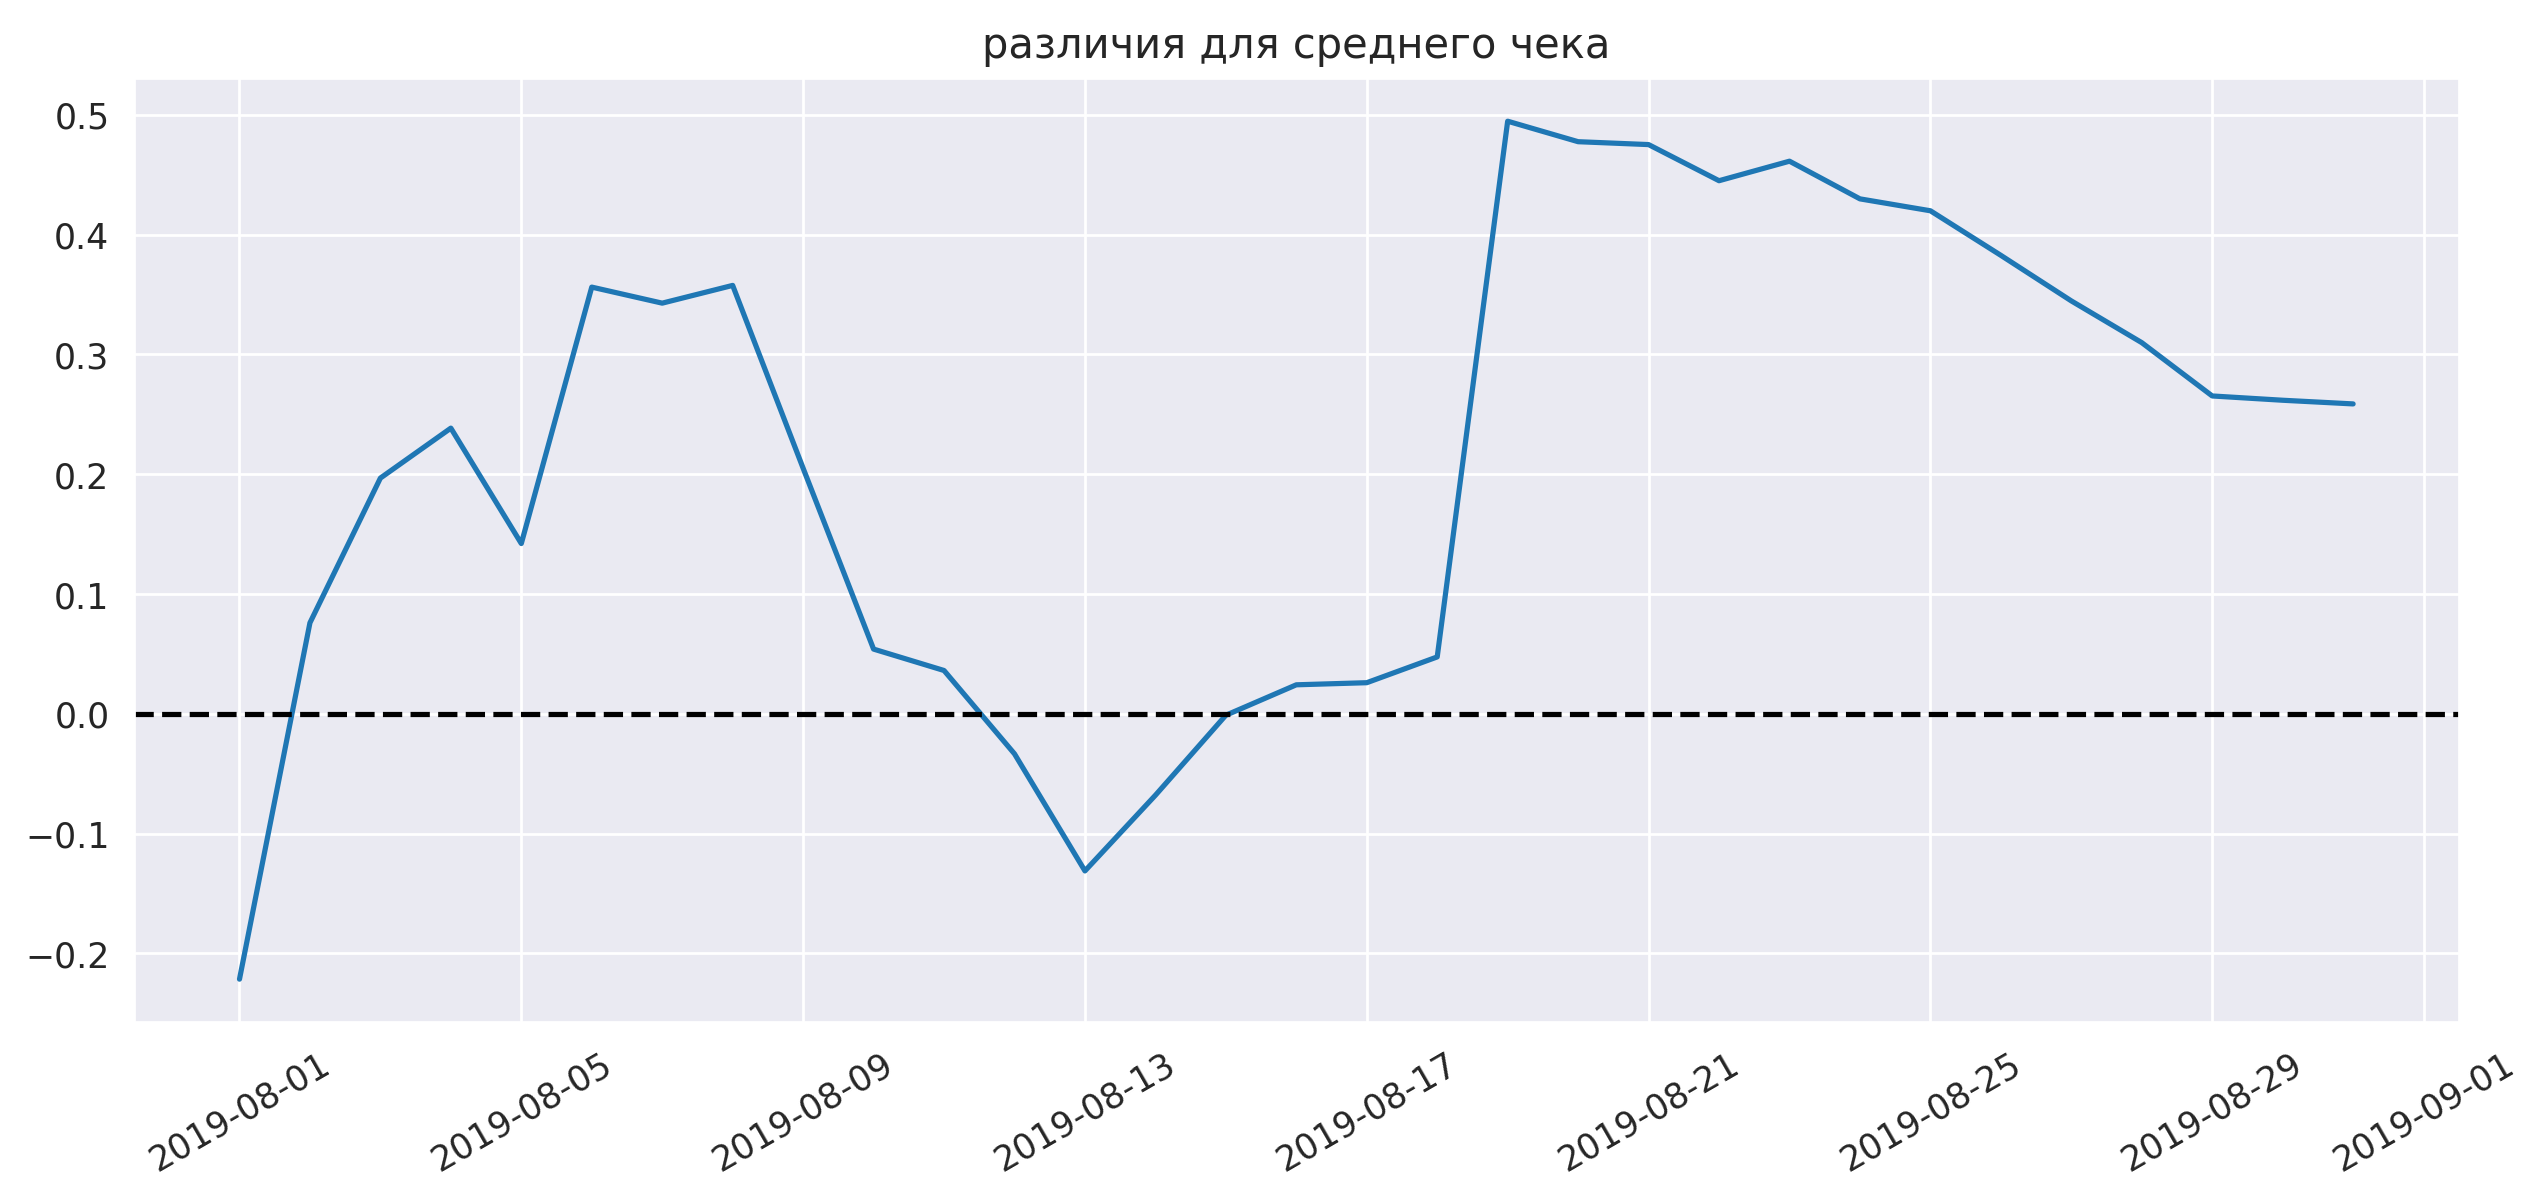

In [41]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(12, 5), dpi= 250)

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('различия для среднего чека', fontsize=12)
plt.ylabel("", fontsize=10)
plt.xticks(rotation=30)
plt.show()

Зная что средний чек группы А стабилизировался после 13 августа, а в группе В с 18 был резкий рост, строить выводы по этому графику будет не корректно.

**Посотроим график кумулятивной конверсии**

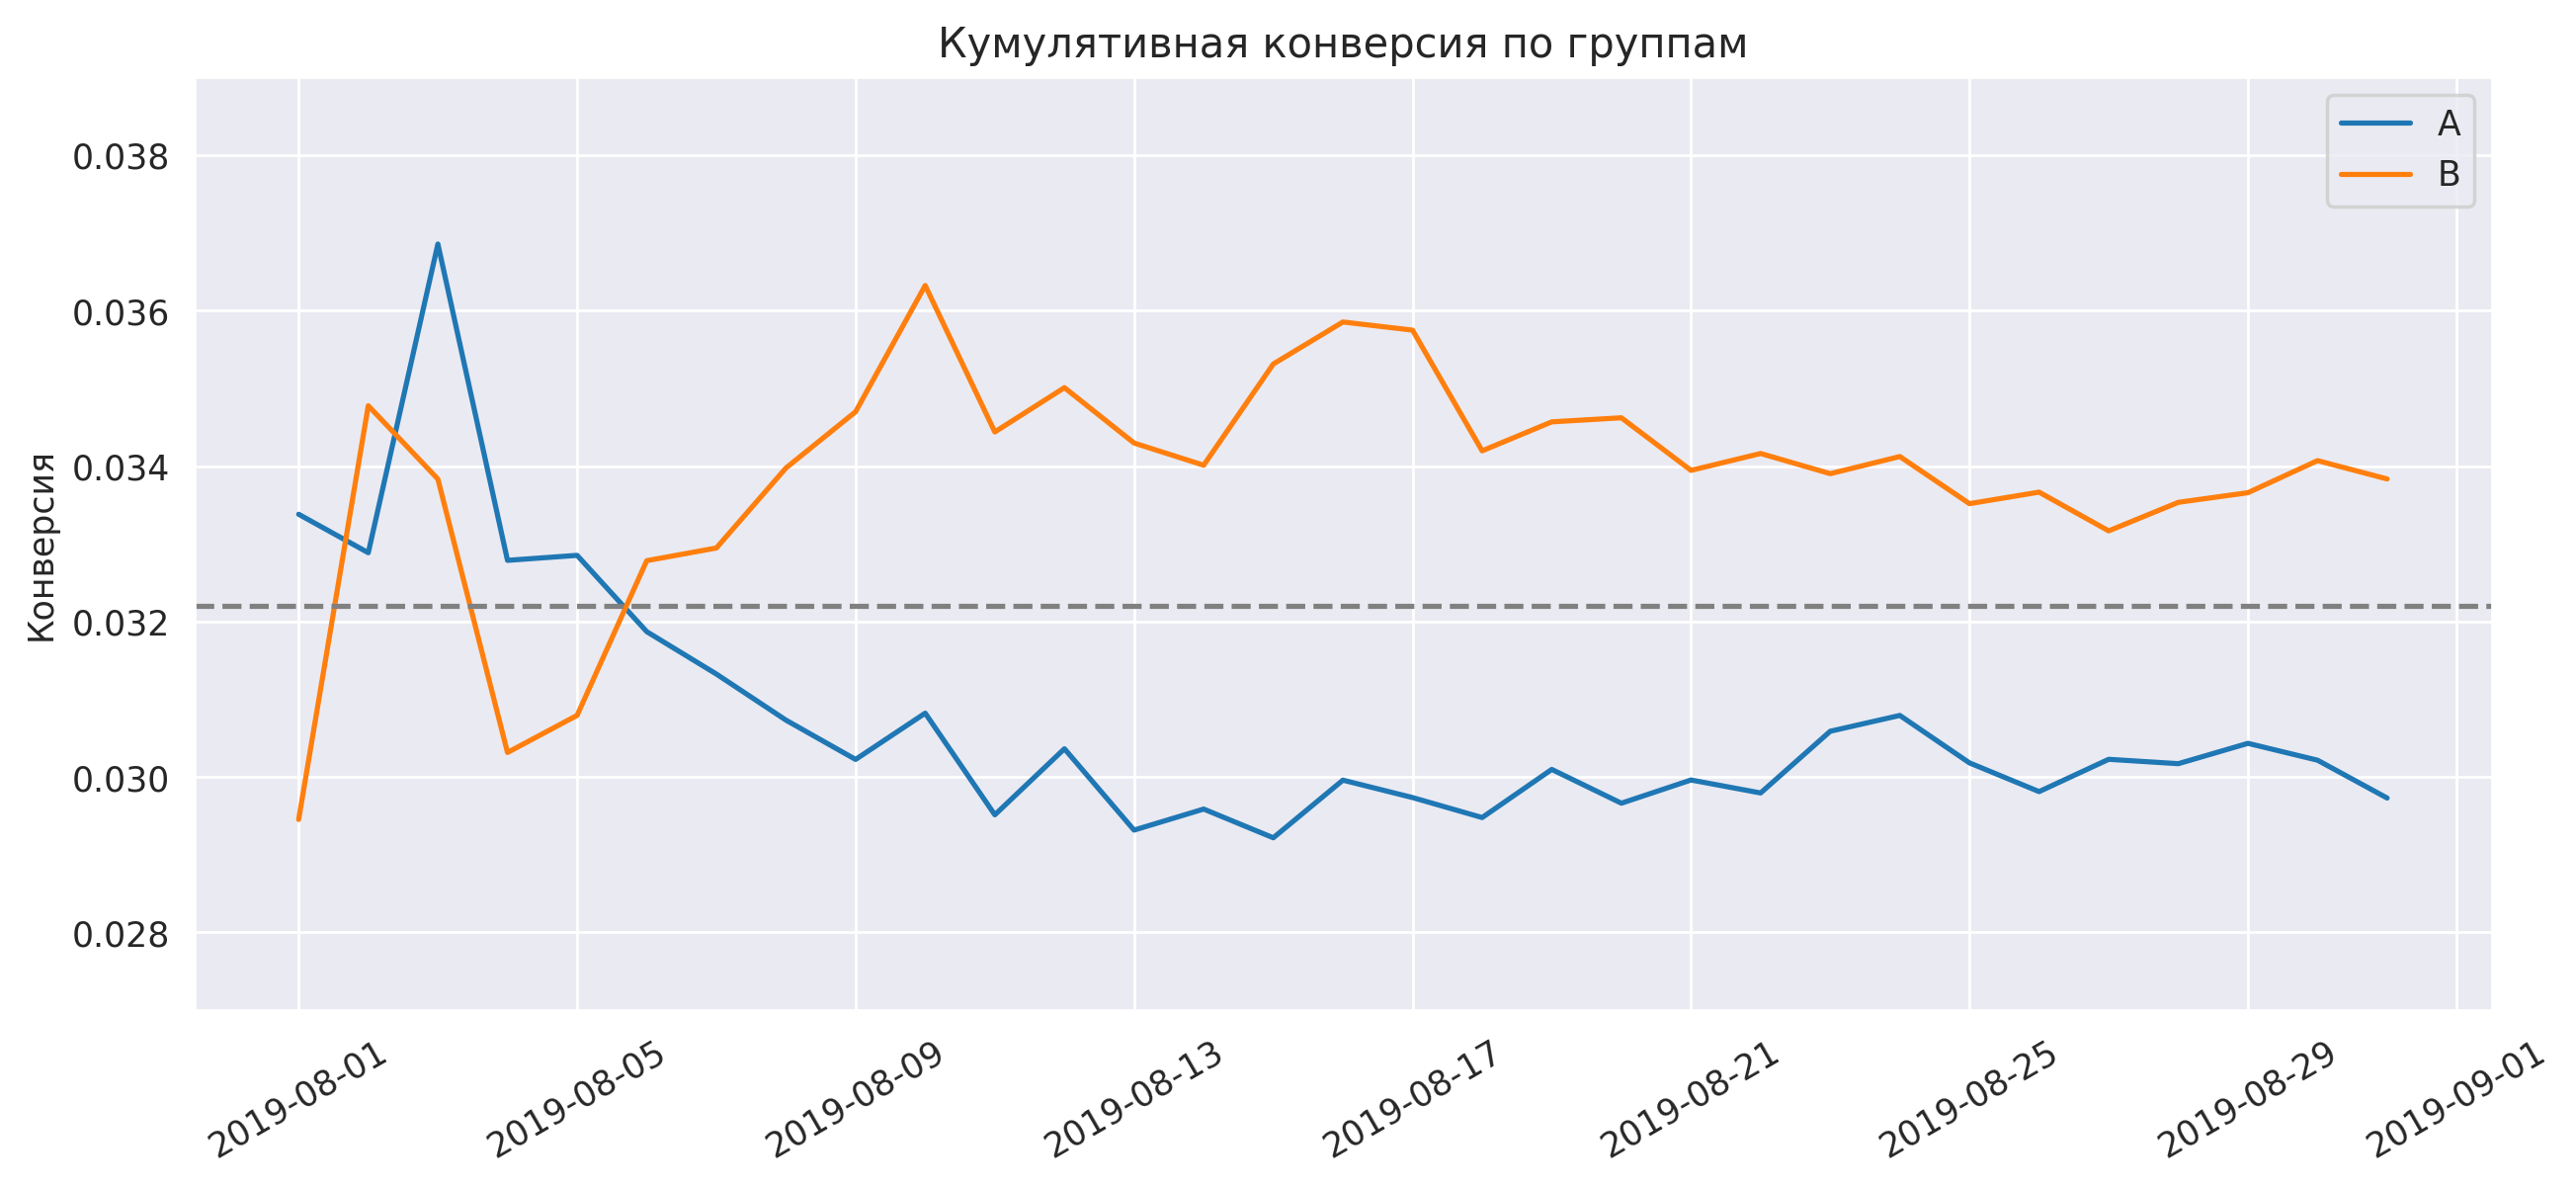

In [42]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(12, 5), dpi= 250)

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
ax.set(ylim=(0.027, 0.039))

# добавляем ось X
plt.axhline(y=0.0322, color='grey', linestyle='--')

plt.title('Кумулятивная конверсия по группам', fontsize=12)
plt.ylabel("Конверсия", fontsize=10)
plt.xticks(rotation=30)
plt.show()

На графике видно, что после 6 августа накопительное среднее количество заказов на посетителя в группе В выше чем в А.  
На данном графике не виден выброс от 18 августа


**Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.**

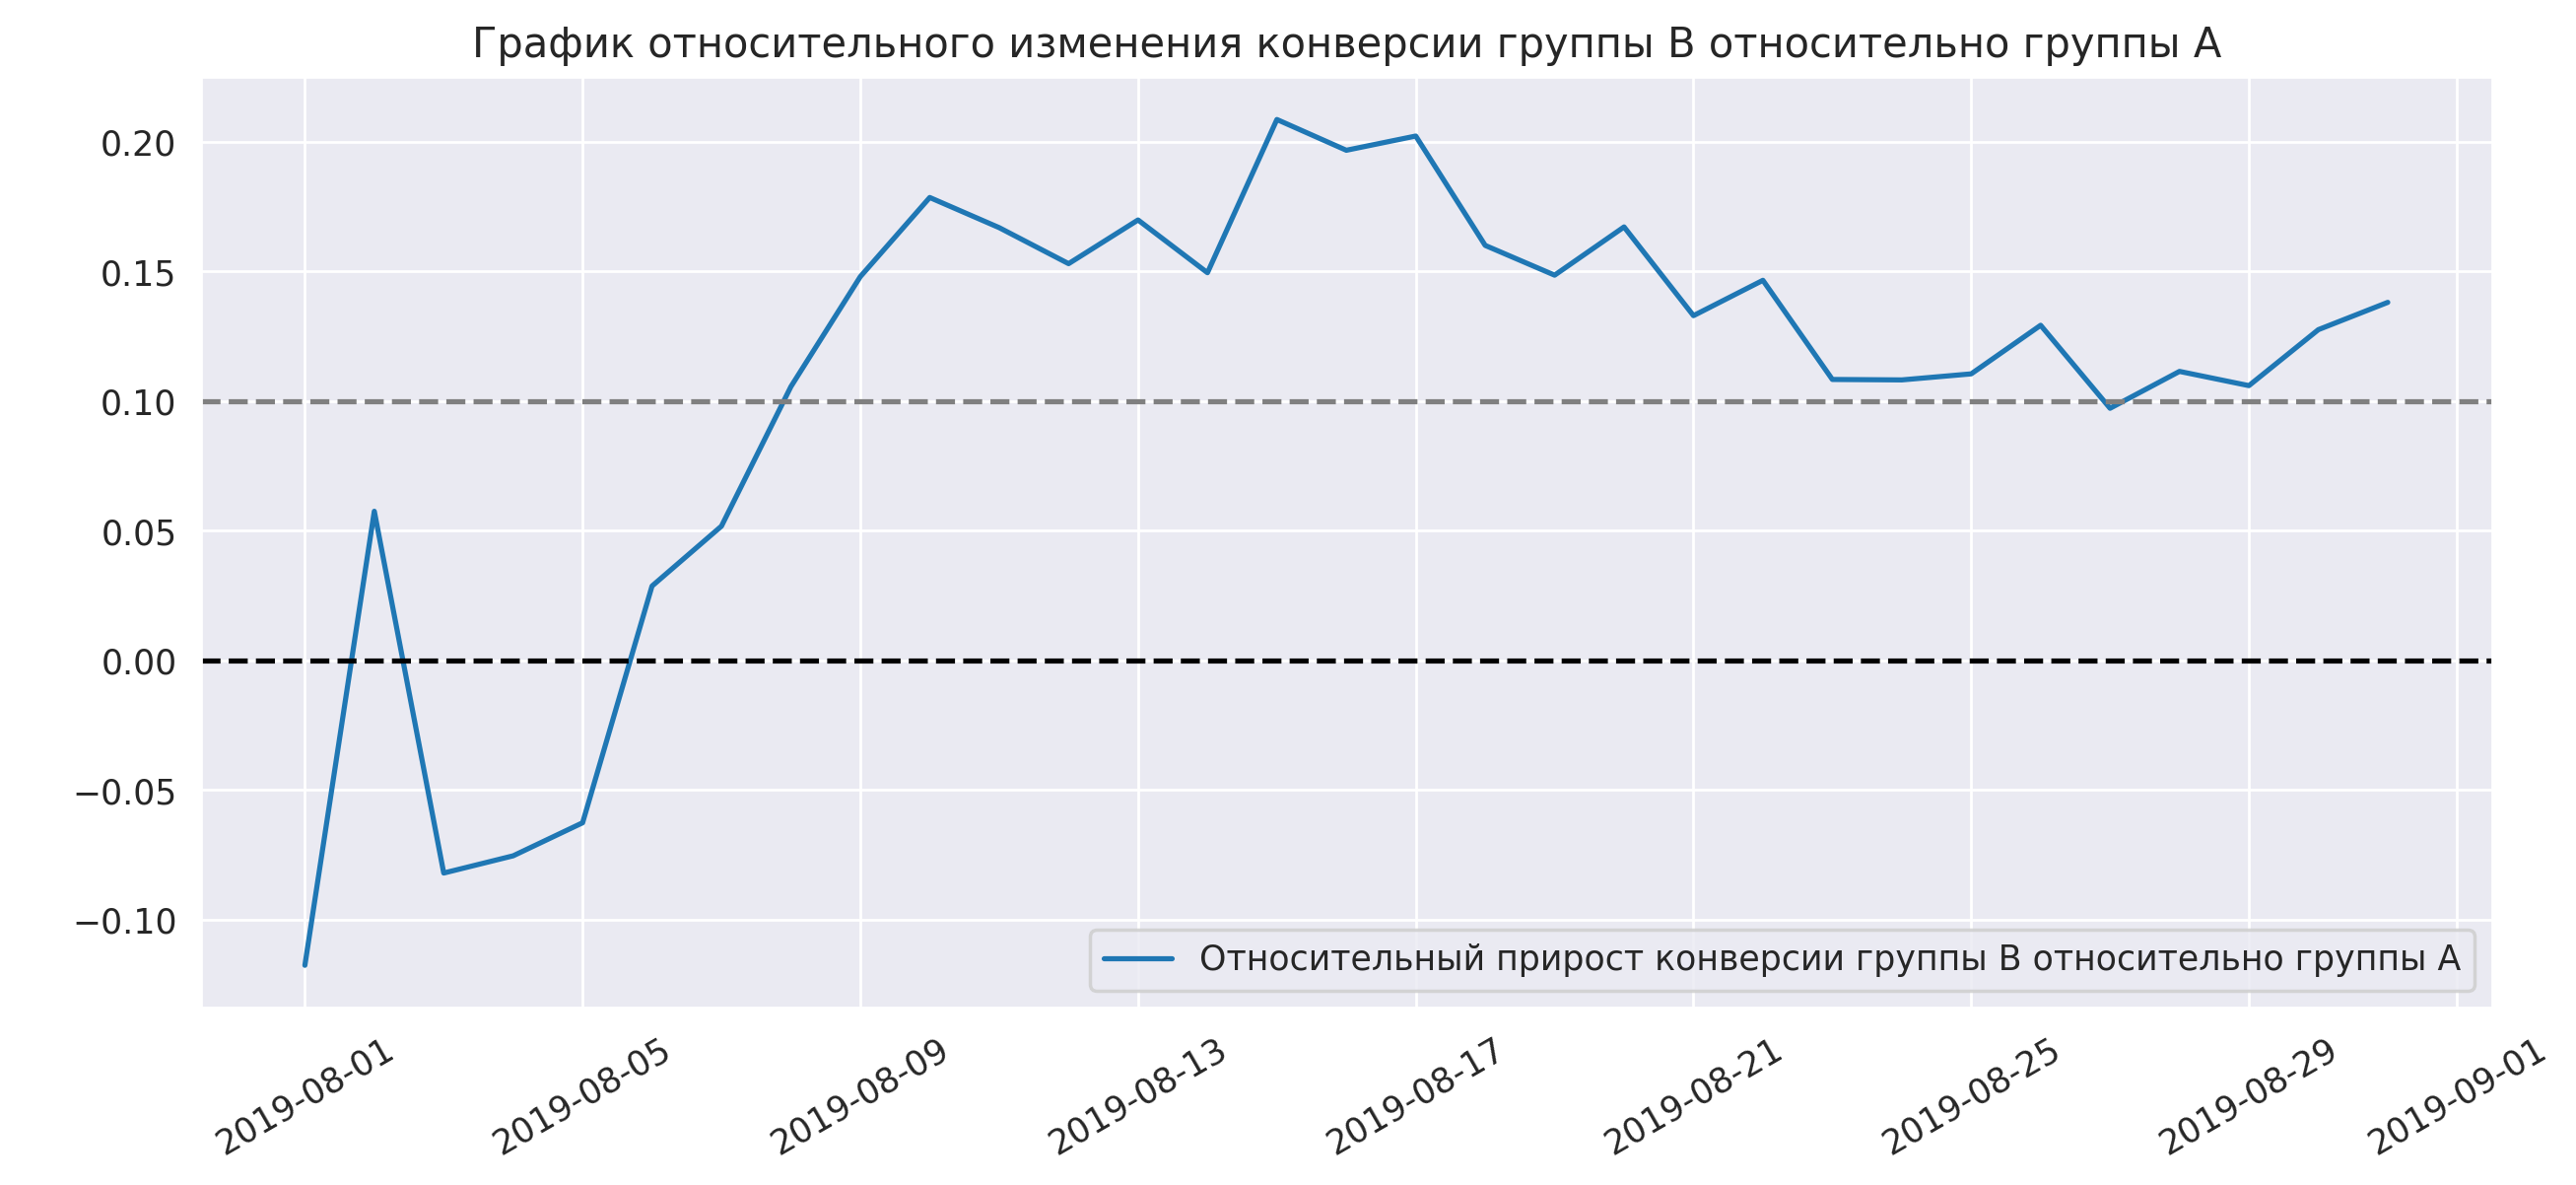

In [43]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(12, 5), dpi= 250)

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.10, color='grey', linestyle='--')

plt.title('График относительного изменения конверсии группы B относительно группы A', fontsize=12)
plt.ylabel(" ", fontsize=10)
plt.xticks(rotation=30)
plt.show()

Конверсия группы В выше, есть волатильность, но на обоих графиках невидно предпосылок к значительному снижению относительного изменения конверсий.

**Анализ аномалий, которые могут искажать результаты A/B-теста**


In [44]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [45]:
orders.sort_values(by='revenue', ascending=False).iloc[0:7]

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A


In [46]:
print(f" Минимальная стоимость заказа: {orders['revenue'].min()}, максимальная: {orders['revenue'].max()},\
 средняя {orders['revenue'].mean().round(2)}")

 Минимальная стоимость заказа: 50, максимальная: 1294500, средняя 8348.01


Построим гистограмму распределения заказов

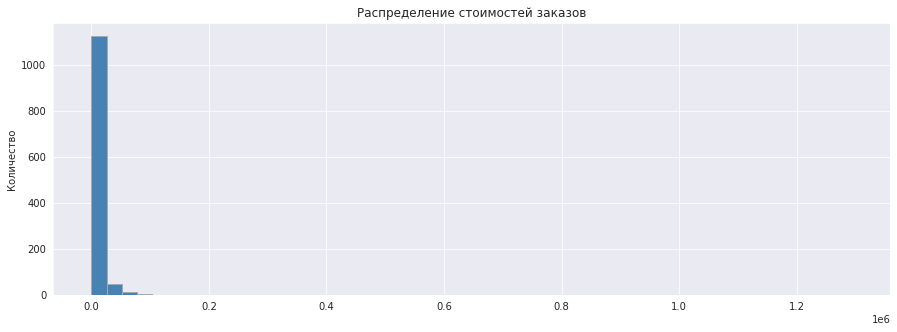

In [47]:
orders['revenue'].hist(bins=50, range=(0,orders['revenue'].max()), color='steelblue',figsize=(15, 5), ec="darkgrey")
plt.title('Распределение стоимостей заказов')
plt.ylabel("Количество", fontsize=10)
plt.show()  

У нас есть два значения из-за которых гистограмма не читаема, установим ограничение в 100000.

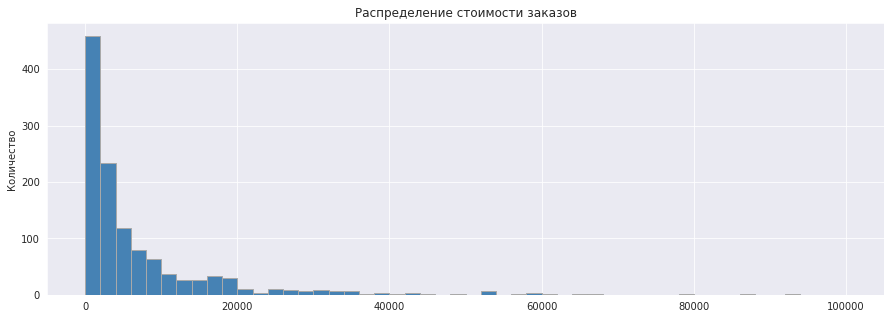

In [48]:
orders['revenue'].hist(bins=50, range=(0,100000), color='steelblue',figsize=(15, 5), ec="darkgrey")
plt.title('Распределение стоимости заказов')
plt.ylabel("Количество", fontsize=10)
plt.show()  

Построим скатерплот

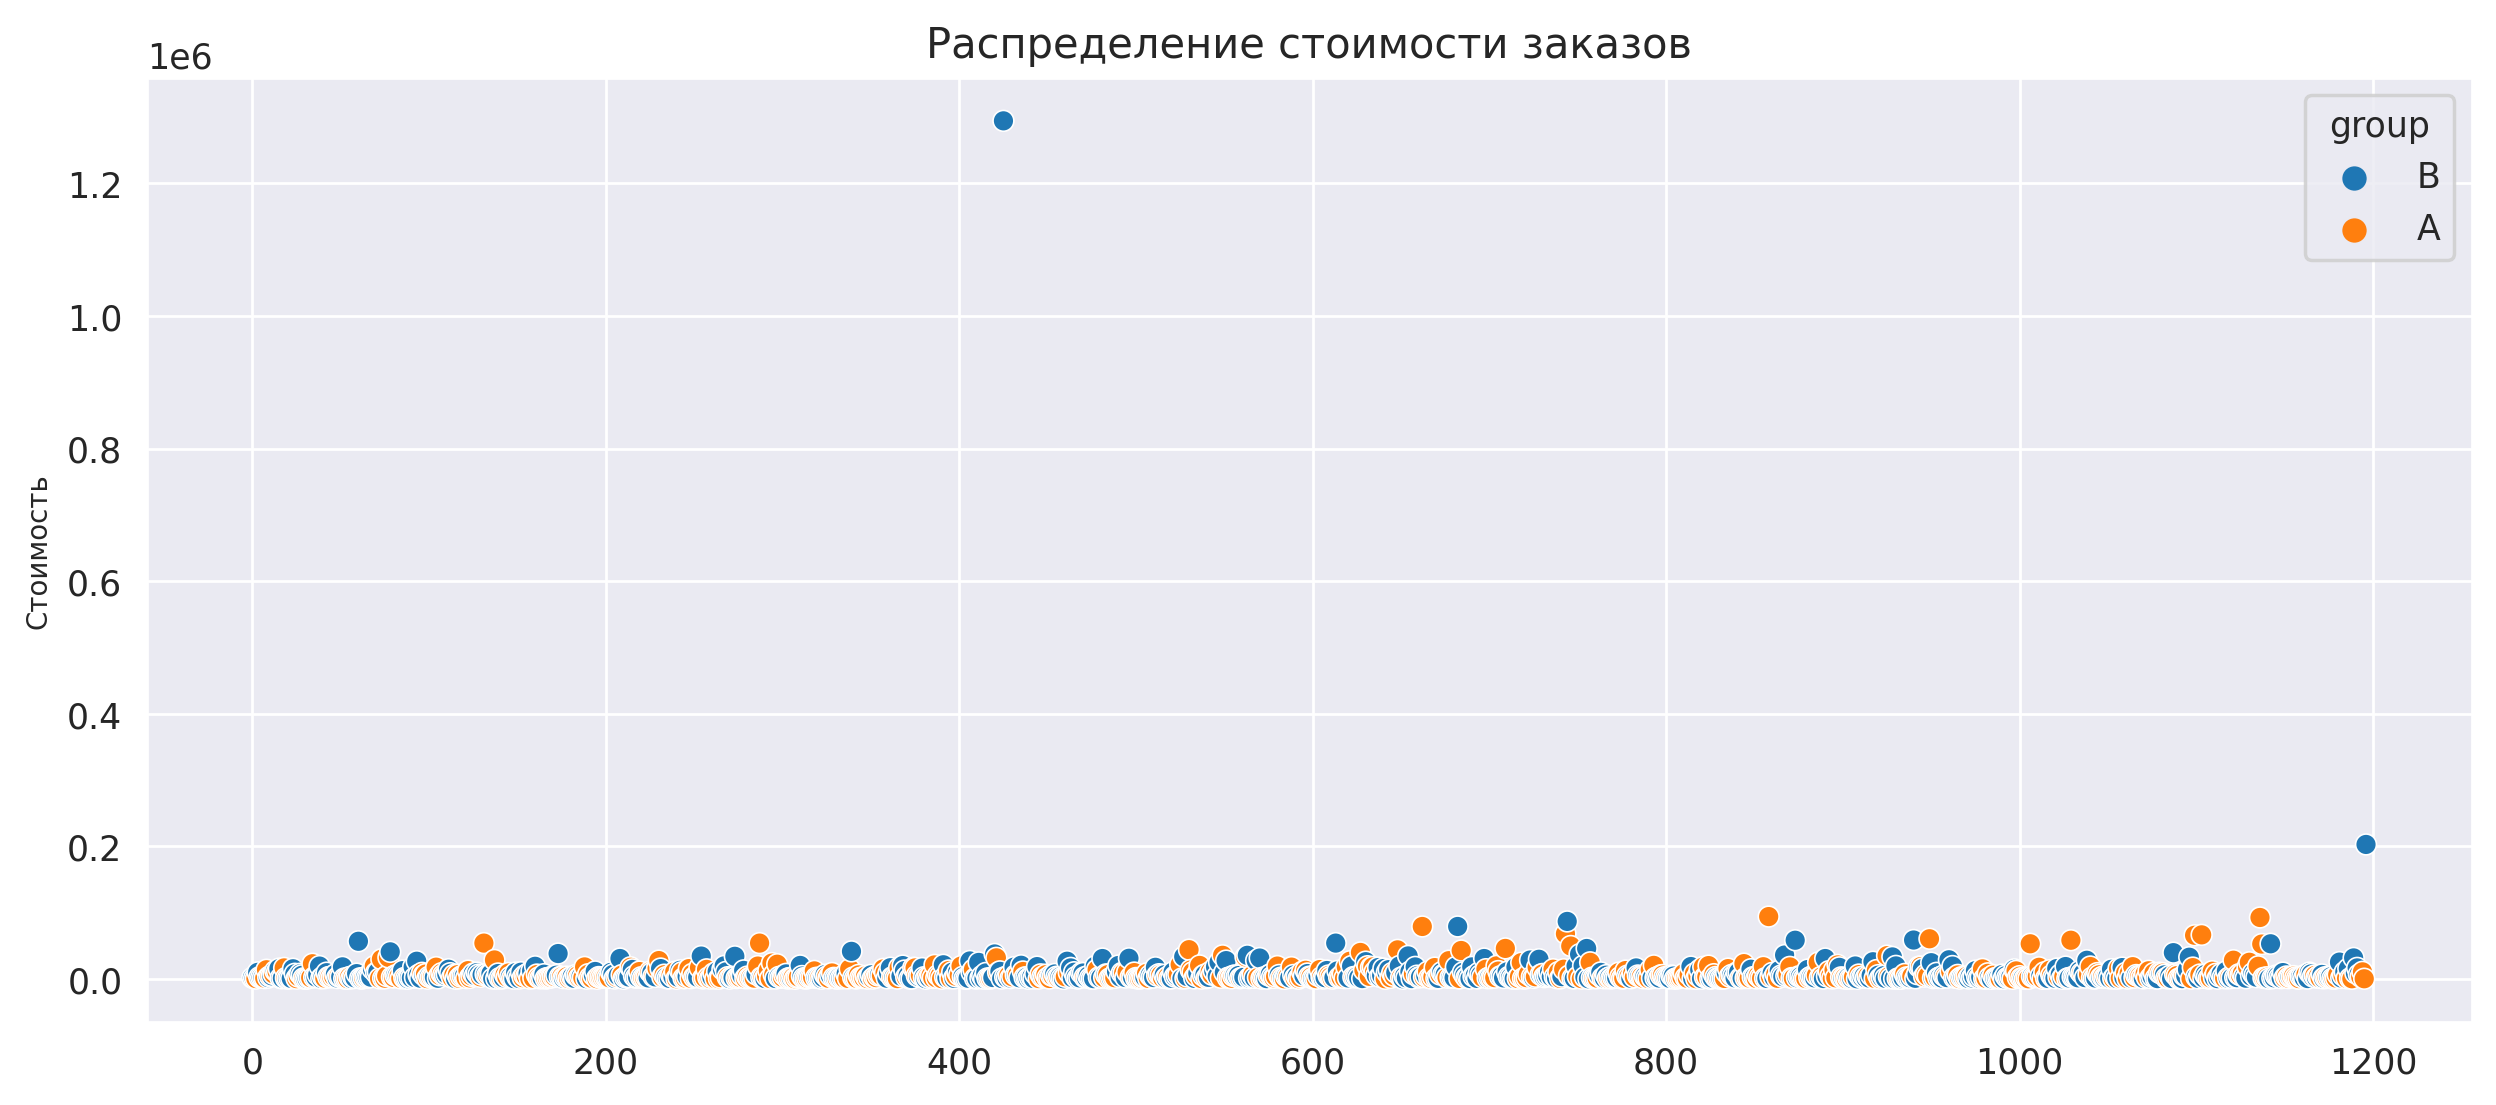

In [49]:
x_values = pd.Series(range(0,len(orders['revenue'])))

sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(12, 5), dpi= 250)

sns.scatterplot(data=orders, x=x_values,  y='revenue', hue='group') 

plt.title('Распределение стоимости заказов')
plt.ylabel("Стоимость", fontsize=8)
plt.show() 

Удалим два выбивающихся значения и построим скатерплот еще раз

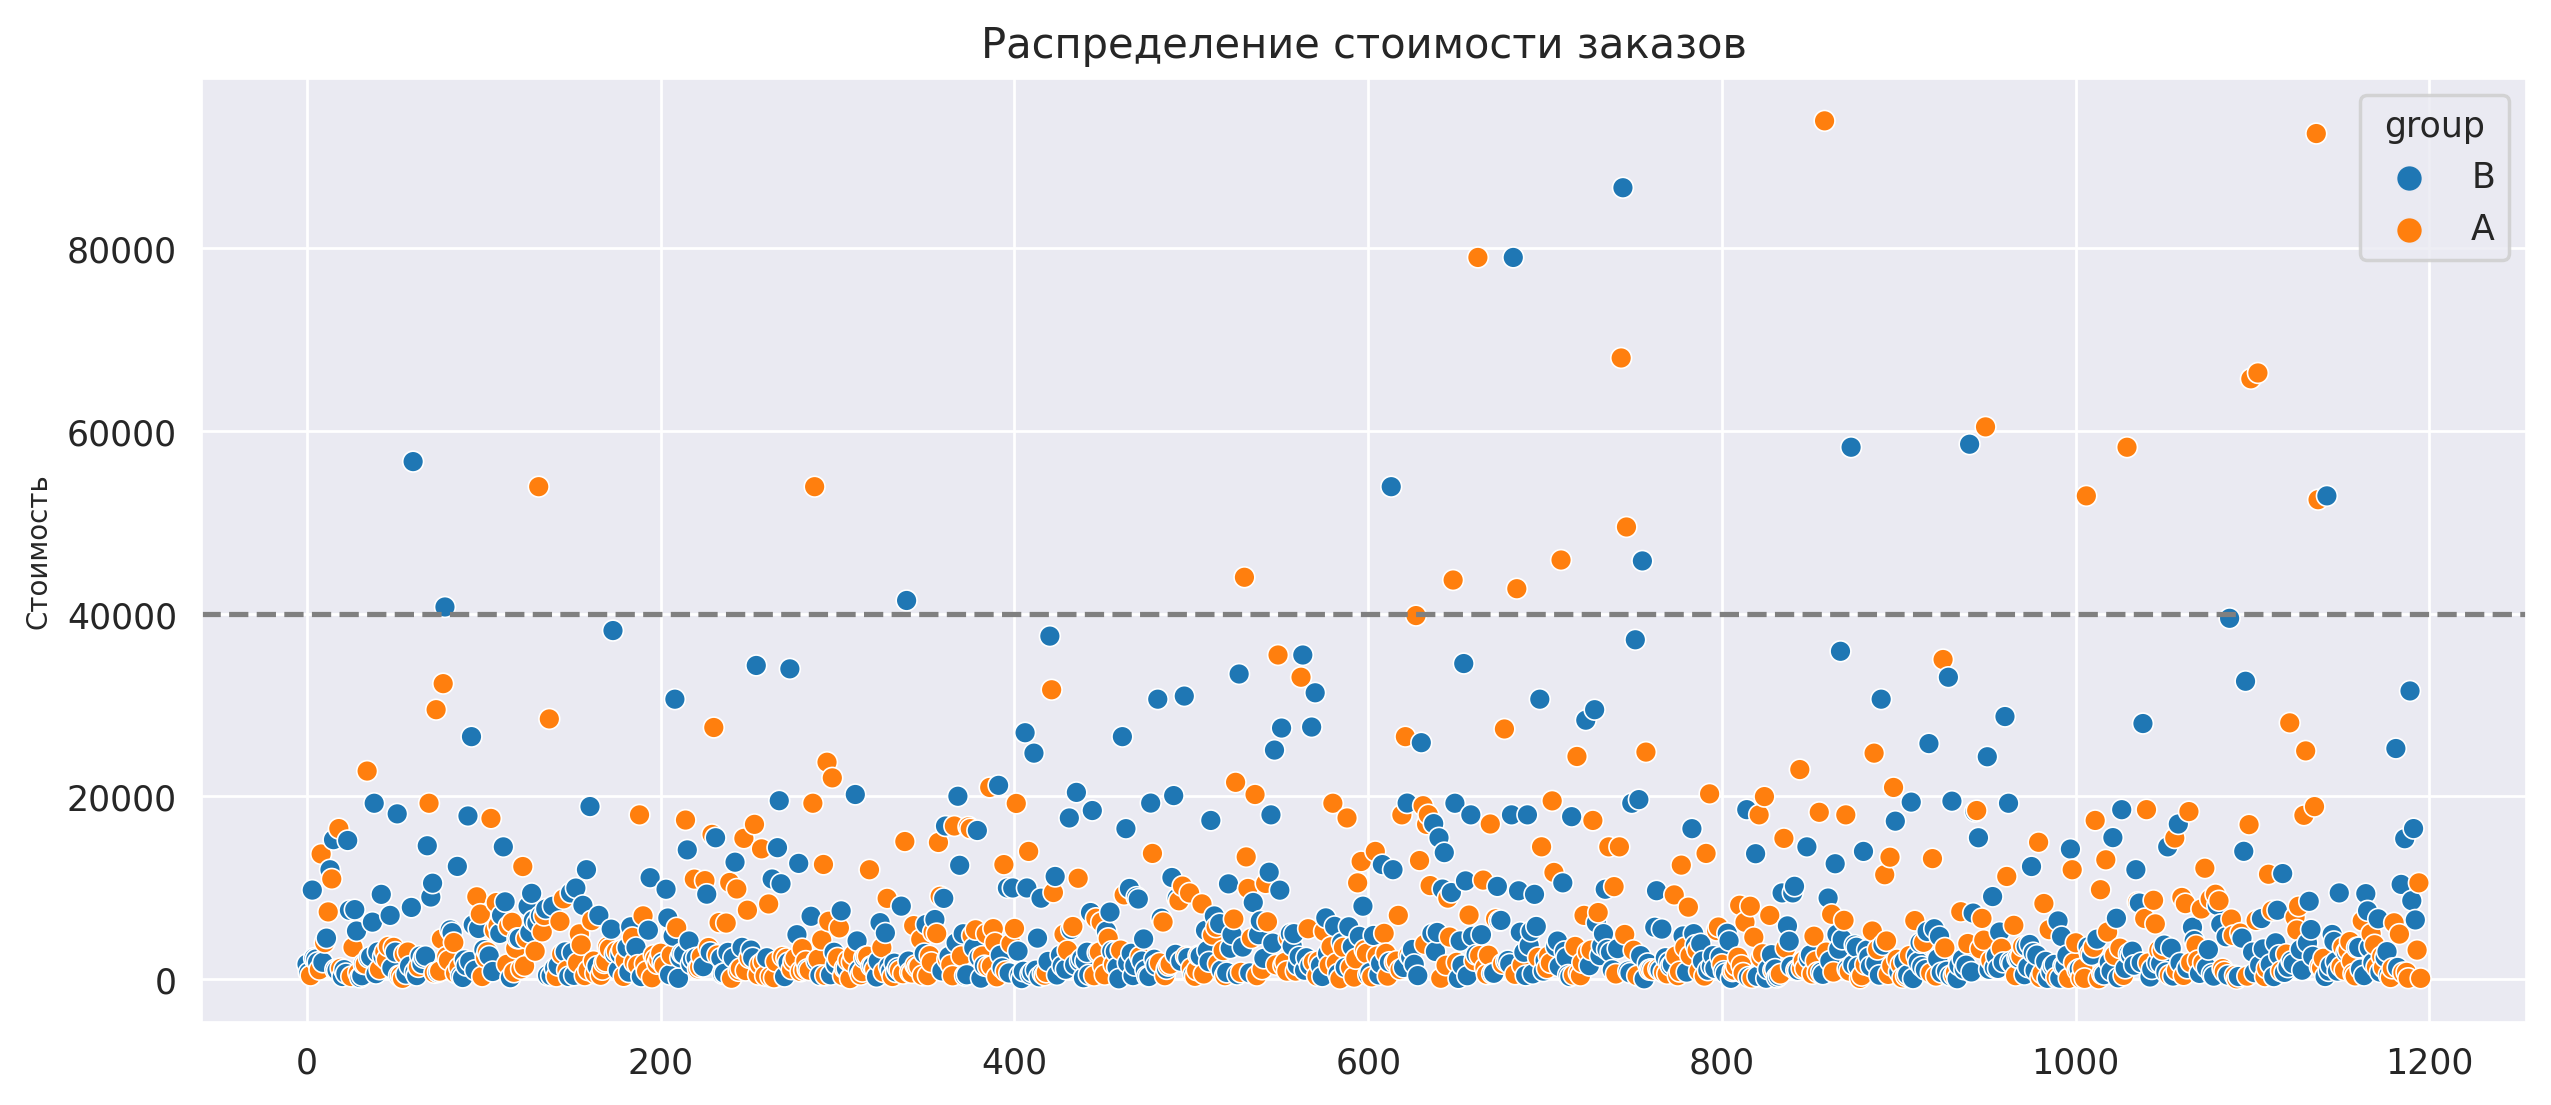

In [50]:
x_values = pd.Series(range(0,len(orders['revenue'])))

sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(12, 5), dpi= 250)

sns.scatterplot(data=orders[orders['revenue'] < 100000 ], x=x_values,  y='revenue', hue='group') 

plt.axhline(y=40000, color='grey', linestyle='--')
plt.title('Распределение стоимости заказов')
plt.ylabel("Стоимость", fontsize=8)
plt.show() 

Всё, как предполагали: есть немного дорогих заказов.  
По графику можно выбрать границу аномальных заказов, но для точности применим метод percentile() из библиотеки Numpy

In [51]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Только 5% пользователей совершили покупку дороже 28000. Далее в исследовании будем считать заказы дороже 28000 аномалиями.  
Подсчитаем количество заказов по пользователям и посмотрим на результат:

In [52]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'}))

ordersByUsers.columns = ['userId', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).iloc[0:6]

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5


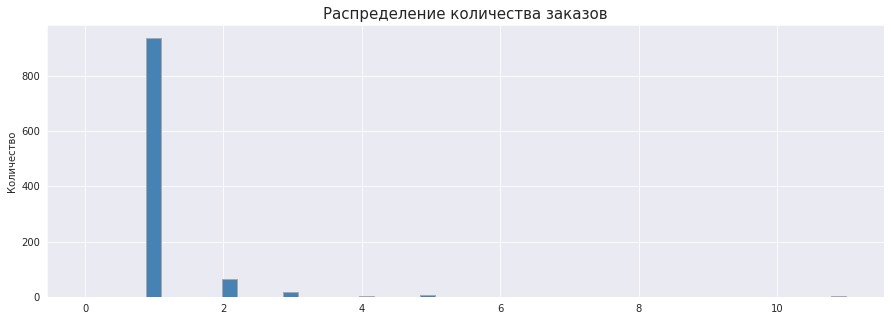

In [53]:
ordersByUsers['orders'].hist(bins=50, range=(0,ordersByUsers['orders'].max()), color='steelblue',figsize=(15, 5), ec="darkgrey")
plt.title('Распределение количества заказов', fontsize=15)
plt.ylabel("Количество", fontsize=10)
plt.show()  

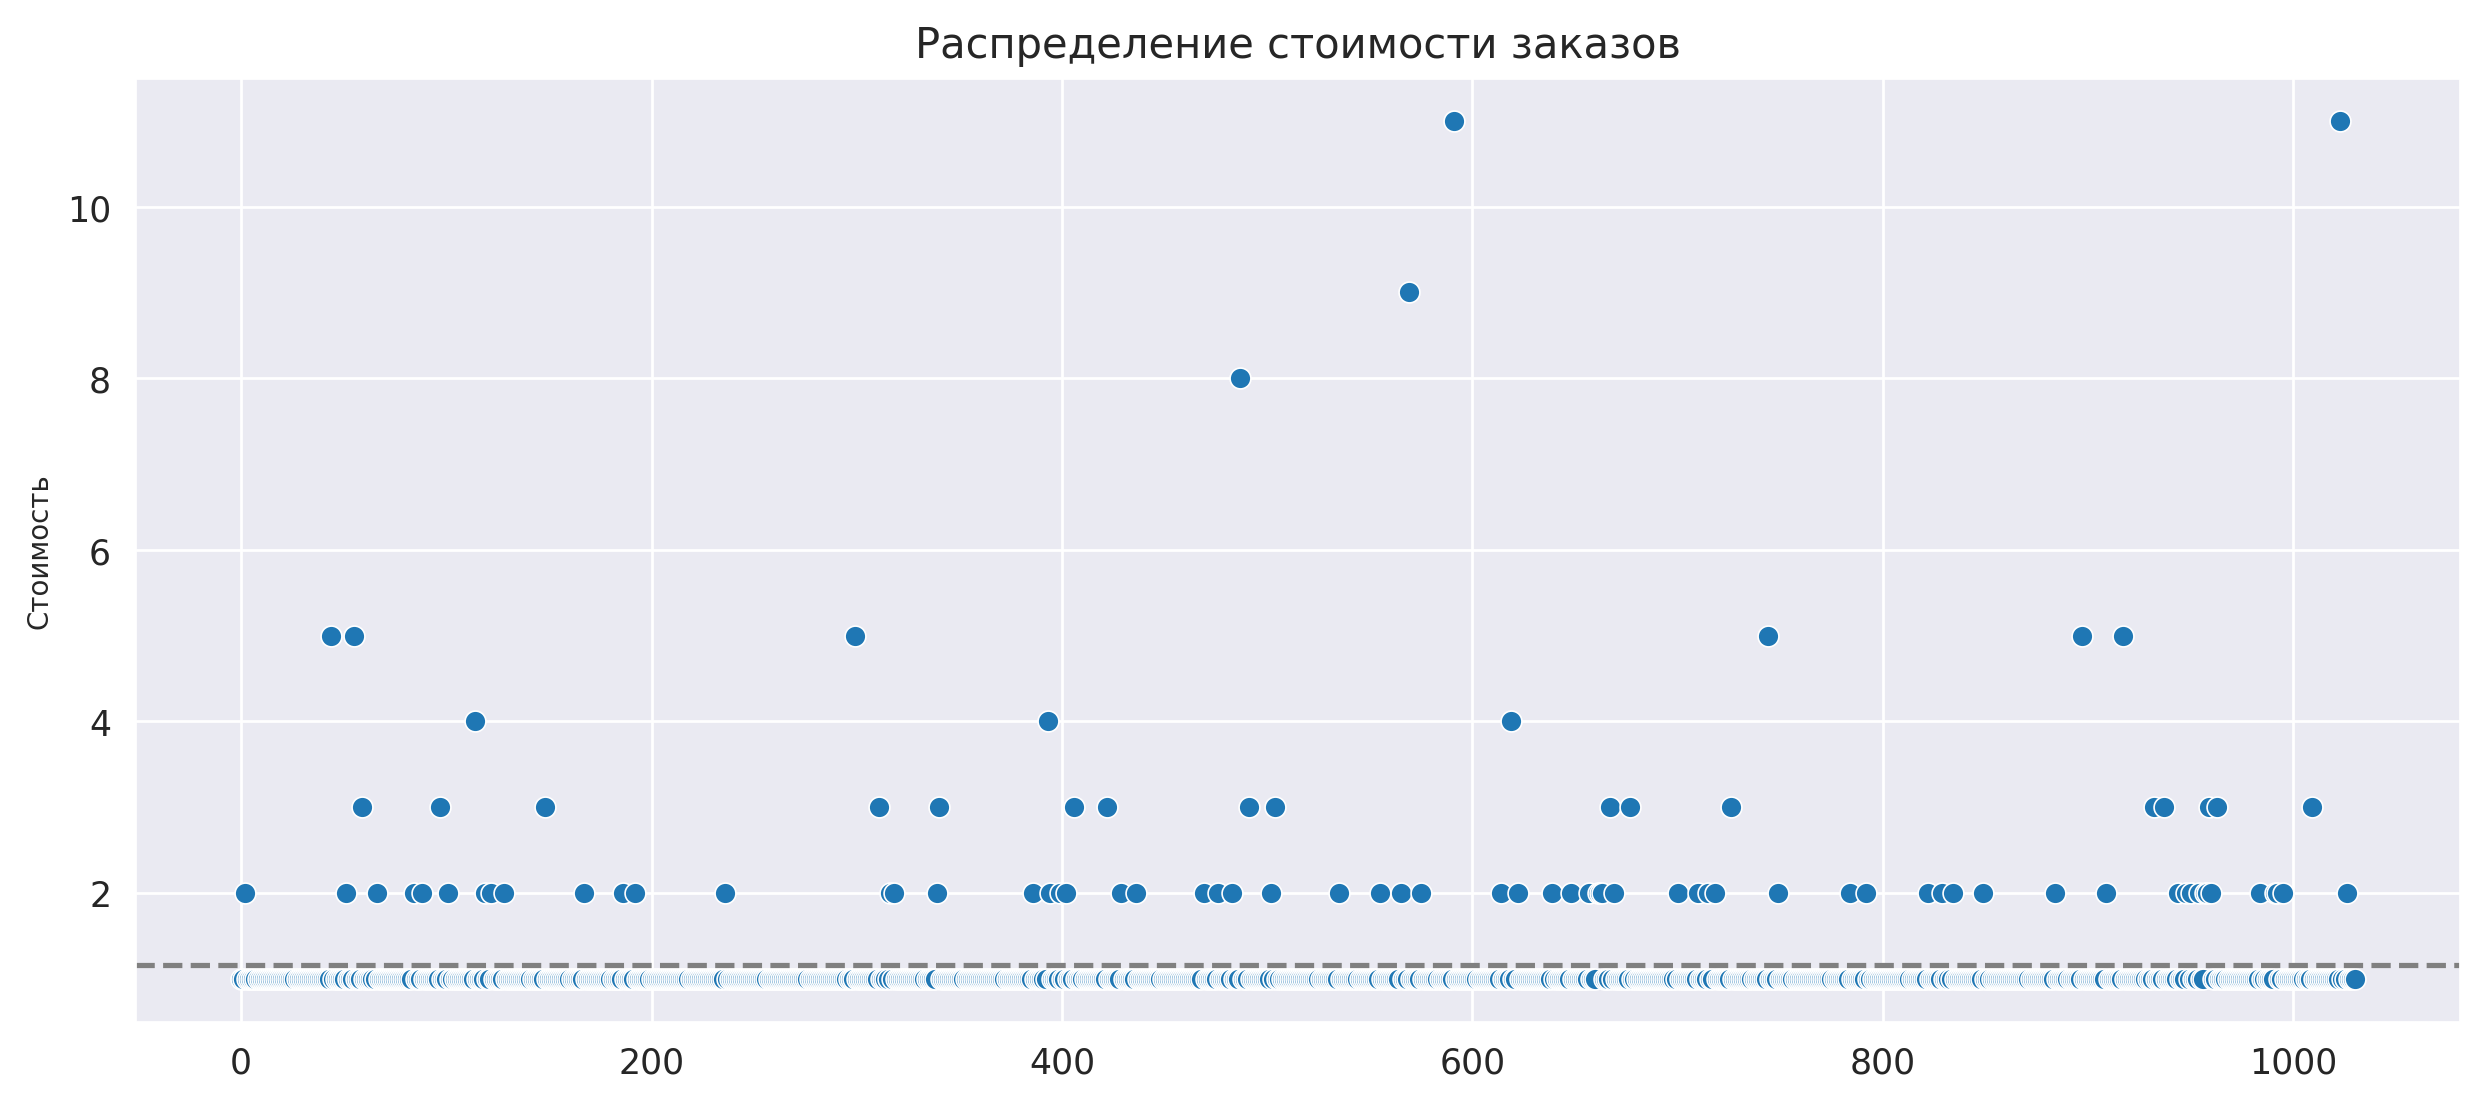

In [54]:
x_values = pd.Series(range(0,len(orders['revenue'])))

sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(12, 5), dpi= 250)

sns.scatterplot(data=ordersByUsers, x=x_values,  y='orders') 

plt.axhline(y=ordersByUsers['orders'].mean(), color='grey', linestyle='--')
plt.title('Распределение стоимости заказов')
plt.ylabel("Стоимость", fontsize=8)
plt.show() 

In [55]:
print(F"В среднем заказывают {ordersByUsers['orders'].mean().round(2)}")

В среднем заказывают 1.16


Много пользователей с 2 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.  
Что бы ответить на этот вопрос, применим метод percentile()

In [56]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

Разумно выбрать 2 заказы на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Проверка статистической гипотезы.

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

**Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным**

Сформулируем гипотезы.   
`Нулевая`: Нет статистически значимого различия по среднему количеству заказов между группами.  
`Альтернативная`: Различия по среднему количеству заказов между группами есть.  

Для проверки гипотезы, будем использовать специальный непараметрический тест `Манна-Уитни`    
Критический уровень статистической значимости укажем `0,05` 

Начнём с подготовки данных

In [57]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [58]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeData[cumulativeData['group'] == 'A']['visitors'].max() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [59]:
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeData[cumulativeData['group'] == 'B']['visitors'].max() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [60]:
alpha = .05

results = stats.mannwhitneyu(sampleA, sampleB)[1]

print("p-значение: {0:.3f}".format(results))



if results < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    
print("Относительные различия в среднем чеке между группами {0:.5f}".format(sampleB.mean() / sampleA.mean() - 1))

p-значение: 0.017
Отвергаем нулевую гипотезу
Относительные различия в среднем чеке между группами 0.13808


По «сырым» данным различия в среднем числе заказов групп A и B есть.   
Относительный проигрыш группы А равен 13.8% — второе число в выводе.


**Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.**

`Нулевая гипотеза:` различий в среднем чеке между группами нет.  
`Альтернативная гипотеза:` различия в среднем чеке между группами есть  
Для проверки гипотезы, будем использовать тот же тест `Манна-Уитни`    
Критический уровень статистической значимости укажем `0,05`  


In [61]:
alpha = .05
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

print("p-значение: {0:.3f}".format(results))

if results < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    
print("Относительные различия в среднем чеке между группами {0:.5f}"
      .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))    

p-значение: 0.729
Не получилось отвергнуть нулевую гипотезу
Относительные различия в среднем чеке между группами 0.25871


Различий в среднем чеке между группами нет, впрочем, средний чек группы B значительно выше среднего чека группы A.

**Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным**

In [62]:
ord = ordersByUsers['orders'].quantile(.95).round()
rev = orders['revenue'].quantile(.95).round()

In [63]:
print(f"Примем за аномальных пользователей тех, кто совершил от {ord} \
заказов или совершил заказ дороже {rev} рублей")

Примем за аномальных пользователей тех, кто совершил от 2.0 заказов или совершил заказ дороже 28000.0 рублей


Узнаем, сколько всего аномальных пользователей 

In [64]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > ord]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > ord]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > rev]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print()
print(f"Всего {abnormalUsers.shape[0]} аномальных пользователей.")

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64

Всего 74 аномальных пользователей.


Ранее мы заметили, что часть пользователей попали в обе группы, данные мы сохранили в переменной `t`,
посмотрим есть ли среди аномальных пользователей наши `ID`

In [65]:
len(np.intersect1d(abnormalUsers, t))

19

Из 58 пользователей которые попали в обе группы, 19 мы удалим из дальнейшего исследования. 

Узнаем, как действия  аномальных пользователей повлияли на результаты теста.  

**Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным**

Сформулируем гипотезы.   
`Нулевая`: Нет статистически значимого различия по среднему количеству заказов между группами.  
`Альтернативная`: Различия по среднему количеству заказов между группами есть.  

Для проверки гипотезы, будем использовать специальный непараметрический тест `Манна-Уитни`    
Критический уровень статистической значимости укажем `0,05` 

In [66]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeData[cumulativeData['group'] == 'A']['visitors'].max() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeData[cumulativeData['group'] == 'B']['visitors'].max() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [67]:
alpha = .05

results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]

print("p-значение: {0:.3f}".format(results))



if results < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    
print("Относительные различия в среднем чеке между группами {0:.5f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

p-значение: 0.013
Отвергаем нулевую гипотезу
Относительные различия в среднем чеке между группами 0.17270


По «очищенным» данным различия в среднем числе заказов групп A и B так же есть.  
Относительный проигрыш группы А увеличился и теперь равен 17.3% — второе число в выводе.

**Посмортим статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным**

`Нулевая гипотеза:` различий в среднем чеке между группами нет.  
`Альтернативная гипотеза:` различия в среднем чеке между группами есть  
Для проверки гипотезы, будем использовать тот же тест `Манна-Уитни`    
Критический уровень статистической значимости укажем `0,05`

In [68]:
alpha = .05
results = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    
print("p-значение: {0:.3f}".format(results))

if results < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    
    

print(
    "Относительные различия в среднем чеке между группами {0:.5f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-значение: 0.738
Не получилось отвергнуть нулевую гипотезу
Относительные различия в среднем чеке между группами -0.01962


По «очищенным» данным не удалось отвергнуть Н0, но относительные различия в среднем чеке между группами заметно сократилось

**Выводы:**  
Есть  статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий;
Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;

### Общий вывод

* В подготовке эксперимента была допущена ошибка из-за которой одни и те же пользователи попали в обе группы. 
  Надо найти причину и устранить ее в будущих тестах.
* Мы помогли отделу маркетинга приоритизировать гипотезы, от метода зависит конечный результат. 
* Конверсия группы В выше, есть волатильность, но на графиках `Кумулятивная конверсия` и `График относительного изменения конверсии группы B относительно группы A`  невидно предпосылок к значительному снижению относительного изменения конверсий
* Есть статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Конверсия  в группе `В` выше конверсии в группе `А`

**Чек-лист готовности проекта**

- [x] Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета
- [x] Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- [x]  Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.  
----------------------
- [x] Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- [x] Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- [x] Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- [x] Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- [x] Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
- [x] Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- [x] Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- [x] Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- [x] Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- [x] Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
- [x] Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения
- [x] Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
- [x] Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- [x] Примите решение по результатам теста и объясните его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест. 